In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print("images_train= ", images_train.shape)
print("class_train= ", cls_train.shape)
print("label_train= ", labels_train.shape)

images_train=  (50000, 32, 32, 3)
class_train=  (50000,)
label_train=  (50000, 10)


In [7]:
x_images_training=images_train[:, :, :, 0]
x_train=x_images_training.reshape((50000, 32*32))
y_train=cls_train
print(x_train.shape)
print(y_train.shape)
print(x_images_training.shape)

(50000, 1024)
(50000,)
(50000, 32, 32)


In [8]:
x_train.max()

1.0

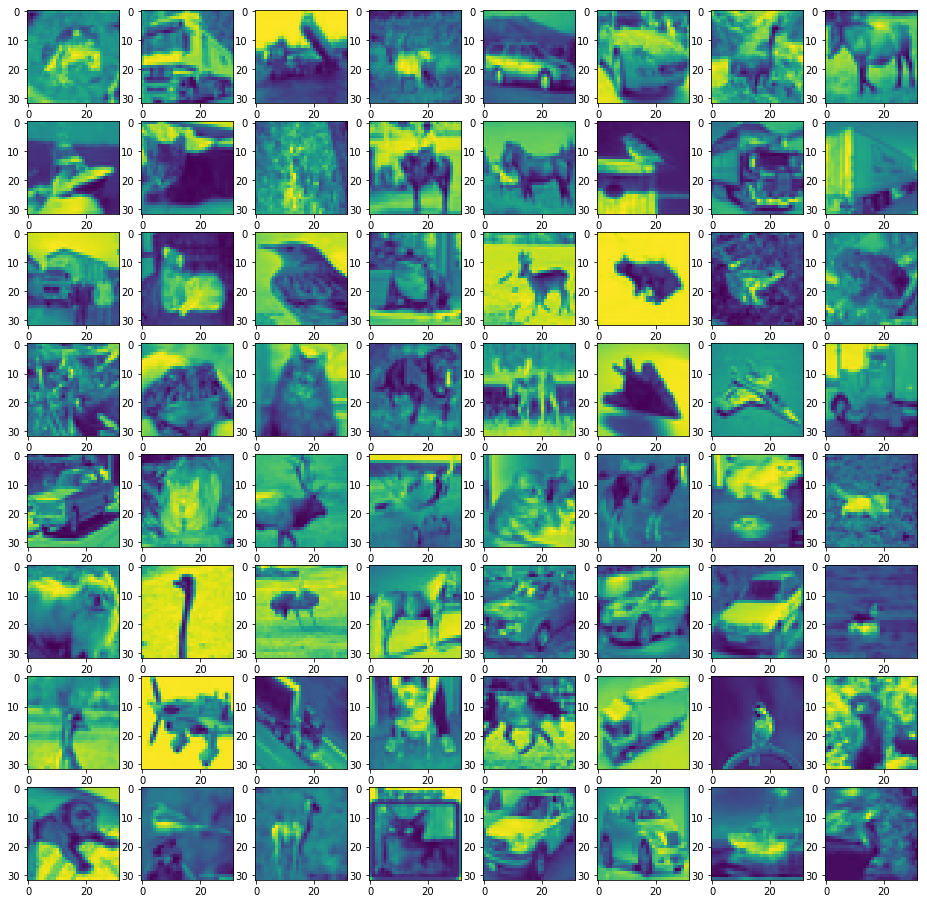

In [9]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(x_images_training[i])
plt.show()

In [10]:
pca=PCA(whiten=True)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [11]:
k=0
current=0
total=sum(pca.explained_variance_)
while current/total<0.99:
    current+=pca.explained_variance_[k]
    k+=1
k

429

In [12]:
pca_cifar=PCA(n_components=k, whiten=True)
x_train_transformed=pca_cifar.fit_transform(x_train)

In [13]:
x_train_transformed.shape

(50000, 429)

In [14]:
print(images_test.shape)
print(cls_test.shape)
print(labels_test.shape)

(10000, 32, 32, 3)
(10000,)
(10000, 10)


In [15]:
x_images_test=images_test[:, :, :, 0]
x_test=x_images_test.reshape((10000, 32*32))
y_test=cls_test
print(x_test.shape)
print(y_test.shape)
print(x_images_test.shape)

(10000, 1024)
(10000,)
(10000, 32, 32)


In [16]:
x_test_transformed=pca_cifar.transform(x_test)

In [17]:
x_test_transformed.shape

(10000, 429)

In [18]:
x_test.max()

1.0

In [24]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
clf1=RandomForestClassifier(n_estimators=429, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)
clf2=LogisticRegression(n_jobs=-1, multi_class="auto")
clf3=KNeighborsClassifier(n_jobs=-1)
clf4=SVC(tol=0.0001)
print("Done")

Done


In [27]:
clf1.fit(x_train_transformed, y_train)
print("Done")
clf2.fit(x_train_transformed, y_train)
print("Done")
clf3.fit(x_train_transformed, y_train)
print("Done")
clf4.fit(x_train_transformed, y_train)
print("Done")

Done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Done
Done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Done


In [28]:
y_test_predicted1=clf1.predict(x_test_transformed)
y_test_predicted2=clf2.predict(x_test_transformed)
y_test_predicted3=clf3.predict(x_test_transformed)
y_test_predicted4=clf4.predict(x_test_transformed)

In [30]:
dic=dict()
ans=[]
for i in range(len(class_names)):
    dic[i]=class_names[i]
for i in range(len(y_test_predicted1)):
    arr=np.array([y_test_predicted1[i], y_test_predicted2[i], y_test_predicted3[i], y_test_predicted4[i]])
    ans.append(dic[np.argmax(np.bincount(arr))])

In [31]:
np.savetxt(fname="answers.csv", X=ans, delimiter=',', fmt="%s")